In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

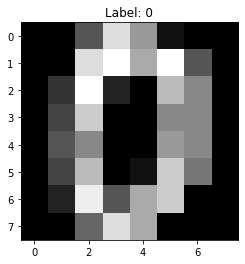

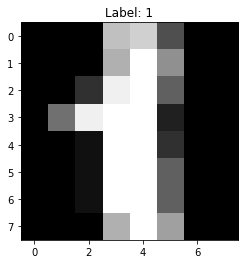

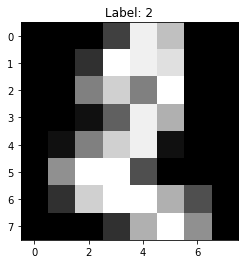

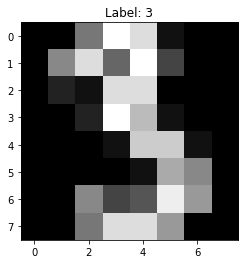

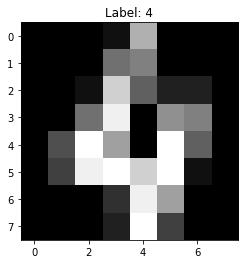

In [3]:
for i in range(5):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()

In [4]:
X = digits.images.reshape(-1, 64)
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x        

In [7]:
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"[{epoch + 1}] Loss: {running_loss / (i + 1)}")

[1] Loss: 1.4080824643373488
[2] Loss: 0.5367497682571412
[3] Loss: 0.3709945544600487
[4] Loss: 0.2953339748084545
[5] Loss: 0.24785001389682293
[6] Loss: 0.21558745726943015
[7] Loss: 0.19611810632050036
[8] Loss: 0.17524719014763832
[9] Loss: 0.16216765940189362
[10] Loss: 0.15371301993727685
[11] Loss: 0.14614073932170868
[12] Loss: 0.13960909470915794
[13] Loss: 0.13171494491398333
[14] Loss: 0.12183772064745427
[15] Loss: 0.11511691976338626
[16] Loss: 0.11198174320161343
[17] Loss: 0.10457212999463081
[18] Loss: 0.09802863486111164
[19] Loss: 0.09742766115814447
[20] Loss: 0.09503919649869204
[21] Loss: 0.08858685158193111
[22] Loss: 0.08536227699369192
[23] Loss: 0.08197747580707074
[24] Loss: 0.0782926419749856
[25] Loss: 0.07450662963092328
[26] Loss: 0.0748405510559678
[27] Loss: 0.06972226733341813
[28] Loss: 0.06967702731490136
[29] Loss: 0.06682644942775369
[30] Loss: 0.06561992960050703
[31] Loss: 0.061323394905775784
[32] Loss: 0.06028544032014906
[33] Loss: 0.058760153

In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model

In [12]:
import matplotlib.pyplot as plt

epochs = range(len(loss))

plt.plot(epochs, 'b', label='Training Loss')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.show()

TypeError: only integer tensors of a single element can be converted to an index